<a href="https://colab.research.google.com/github/dahlia52/Commercial-District-Analysis/blob/main/code/%EB%B0%9C%EB%8B%AC%EC%83%81%EA%B6%8C_%EC%A0%91%EA%B7%BC%EC%84%B1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 발달상권에 해당하는 경우만 보자

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [ ]:
walk = pd.read_csv("./전처리 완료/광진구 상권별 도보 10분 이내 보행자도로.csv")
walk.head()

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명,보행자우선도로명,연장거리,도로폭,시간,도로면적
0,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,광진 동일로52길,210.0,7.0,4.0,1470.0
1,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,광진 군자로,300.0,6.0,8.0,1800.0
2,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,광진 동일로50길,250.0,6.0,2.0,1500.0
3,광진구,구의제1동,골목상권,광진경찰서,127.081126,37.546446,207355,449357,11215850,2110160,A,구의동,광진 아차산로49길,80.0,5.0,8.0,400.0
4,광진구,자양제1동,골목상권,광진정말공원,127.076985,37.536042,206990,448202,11215820,2110154,A,자양동,광진 능동로10길,180.0,5.0,8.0,900.0


In [ ]:
walk['상권_구분_코드_명'].value_counts() #발달상권은 총 19건

골목상권    64
발달상권    19
전통시장    17
Name: 상권_구분_코드_명, dtype: int64

In [ ]:
# 발달상권에 해당하는 경우만 저장
hotplace = walk[walk['상권_구분_코드_명']=='발달상권'].reset_index(drop=True)

In [ ]:
hotplace['상권_코드_명'].value_counts()

구의역          5
어린이대공원역      5
구삼강변맛길       4
군자역          2
건대입구역(건대)    2
아차산역         1
Name: 상권_코드_명, dtype: int64

In [ ]:
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus']=False

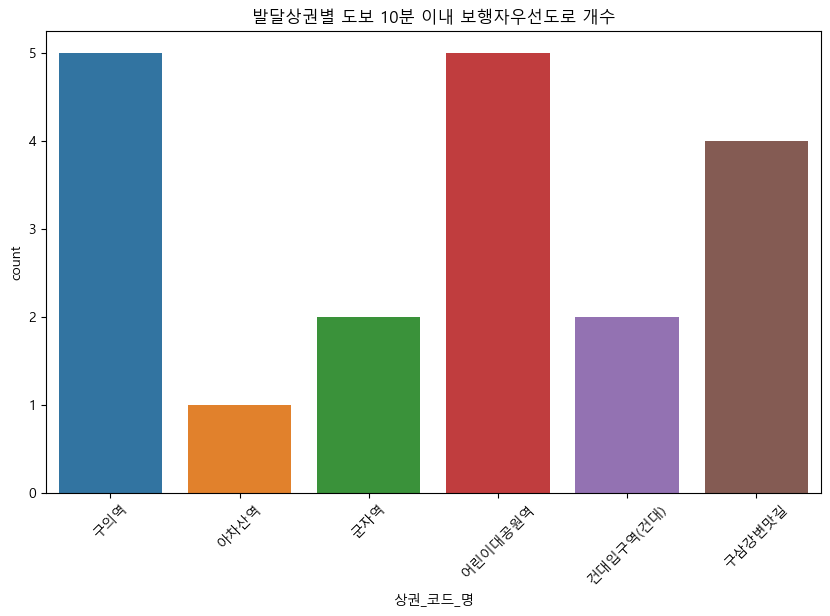

In [ ]:
# 어느 상권에 가까운 보행자우선도로가 많나
plt.figure(figsize=(10,6))
sns.countplot(x = '상권_코드_명', data = hotplace)
plt.xticks(rotation = 45)
plt.title("발달상권별 도보 10분 이내 보행자우선도로 개수")
plt.show() # 어린이대공원역과 구의역(광진구청 근처)에 가까운 보행자우선도로가 많다

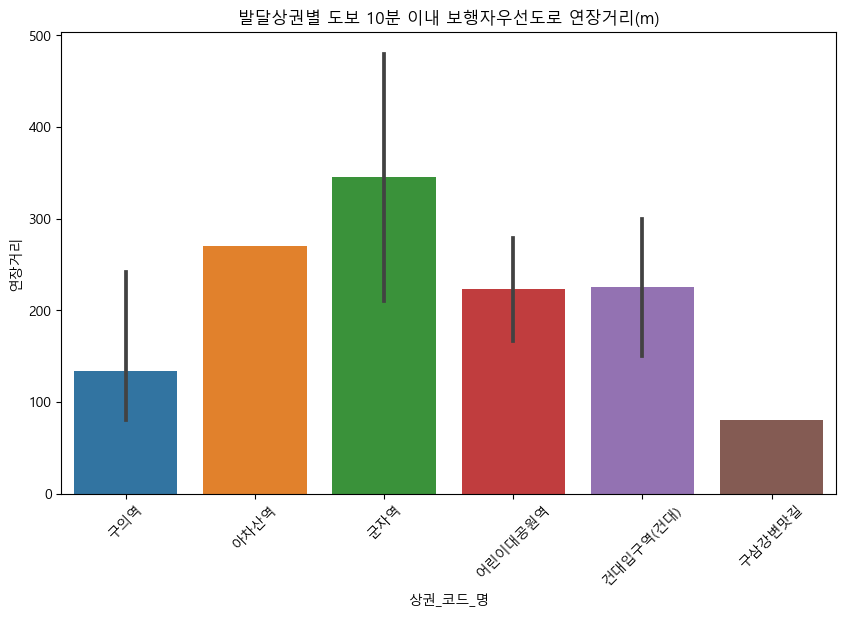

In [ ]:
# 어느 상권의 보행자우선도로가 길까
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y ='연장거리', data = hotplace)
plt.xticks(rotation = 45)
plt.title("발달상권별 도보 10분 이내 보행자우선도로 연장거리(m)")
plt.show() #군자역의 보행자우선도로가 가장 길다

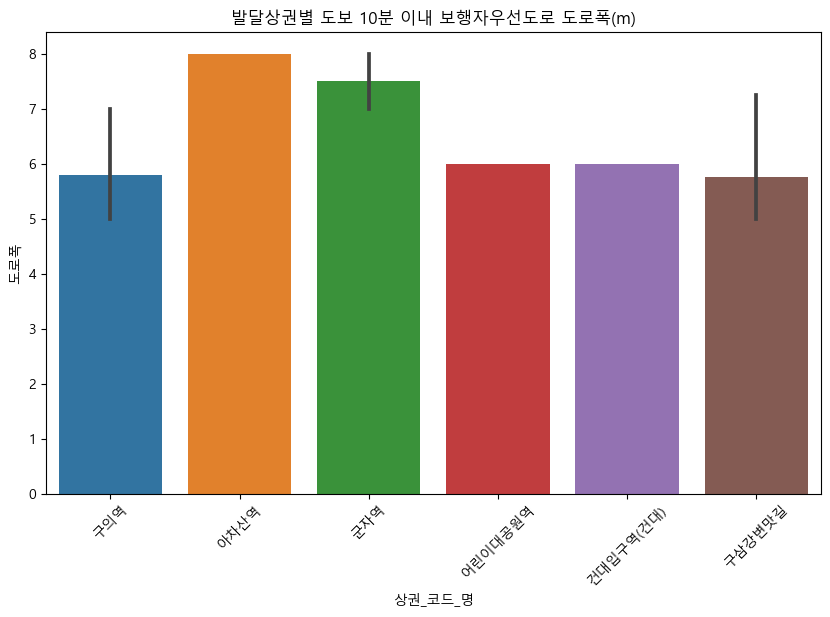

In [ ]:
# 어느 상권의 보행자우선도로가 가장 넓을까
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y ='도로폭', data = hotplace)
plt.xticks(rotation = 45)
plt.title("발달상권별 도보 10분 이내 보행자우선도로 도로폭(m)")
plt.show() #아차산역의 보행자우선도로가 가장 넓다

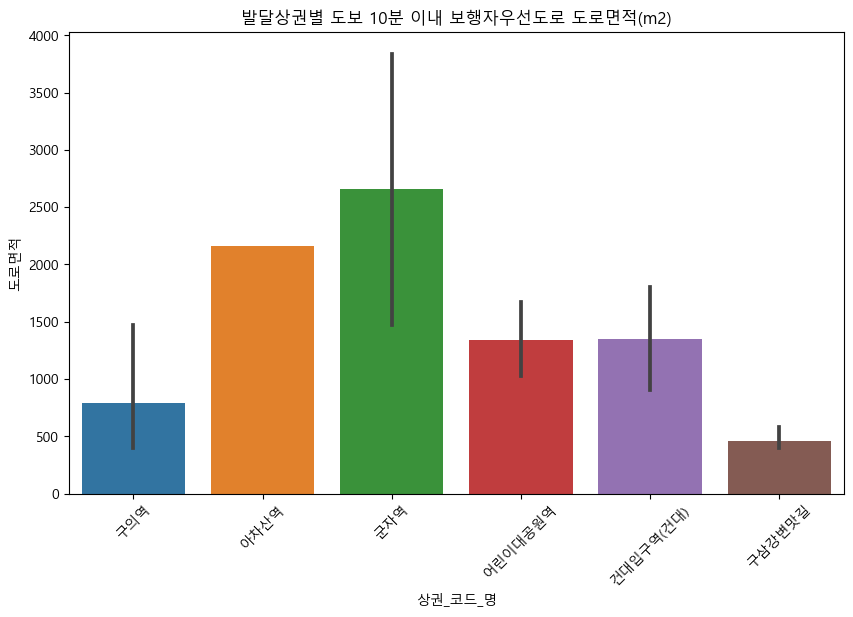

In [ ]:
# 상권별 보행자우선도로 도로면적 비교
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y ='도로면적', data = hotplace)
plt.xticks(rotation = 45)
plt.title("발달상권별 도보 10분 이내 보행자우선도로 도로면적(m2)")
plt.show() # 군자역의 보행자우선도로가 가장 크고, 구삼강변맛길의 도로가 가장 작다

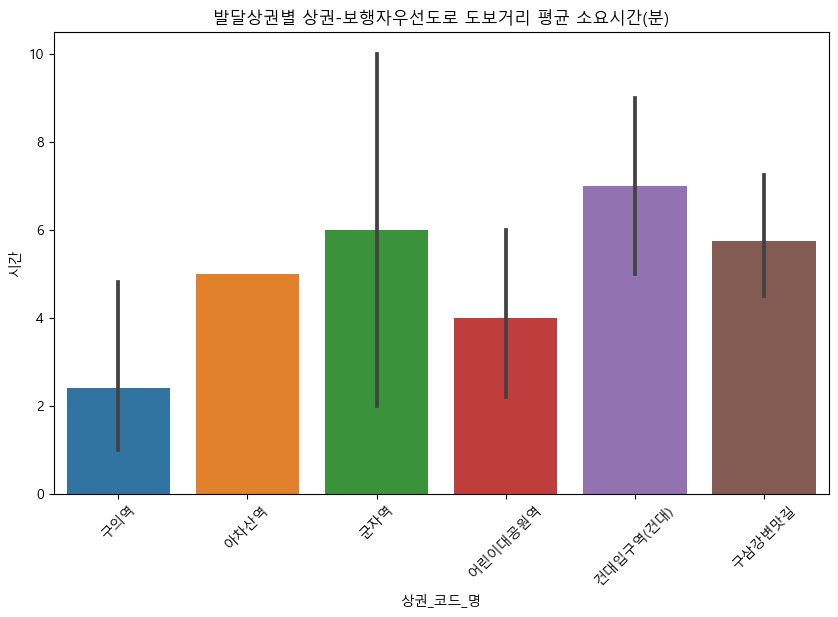

In [ ]:
# 상권별 보행자우선도로 평균 소요시간
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y ='시간', data = hotplace)
plt.xticks(rotation = 45)
plt.title("발달상권별 상권-보행자우선도로 도보거리 평균 소요시간(분)")
plt.show() # 구의역이 상권과 보행자우선도로 간 거리가 가장 가깝고, 건대입구역이 상권과 보행자우선도로 간 거리가 멀다

In [ ]:
bicycle = pd.read_csv("./전처리 완료/광진구 상권별 자전거 5분 이내 자전거도로.csv")
bicycle.head()

,시군구명,행정동명,상권_구분_코드_명,상권_코드_명,경도,위도,엑스좌표_값,와이좌표_값,행정동코드,상권_코드,상권_구분_코드,법정동명,노선명,총연장,일반도로폭,자전거도로폭,시간,일반도로면적,자전거도로면적
0,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,광진 동일로,3000.0,30.0,4.00,3.0,90000.0,12000.0
1,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,광진 능동로,1675.0,25.0,3.00,2.0,41875.0,5025.0
2,광진구,군자동,골목상권,세종대학교,127.074085,37.555226,206732,450331,11215730,2110149,A,군자동,광진 천호대로,1550.0,50.0,4.10,5.0,77500.0,6355.0
3,광진구,중곡제1동,골목상권,중곡1동 마을마당,127.074513,37.564290,206769,451337,11215740,2110150,A,중곡동,광진 동일로,3000.0,30.0,4.00,5.0,90000.0,12000.0
4,광진구,중곡제1동,골목상권,중곡1동 마을마당,127.074513,37.564290,206769,451337,11215740,2110150,A,중곡동,광진 긴고랑로,1040.0,25.0,4.25,3.0,26000.0,4420.0


In [ ]:
### 발달상권만 저장
hotplace2 = bicycle[bicycle['상권_구분_코드_명'] == '발달상권'].reset_index(drop=True)
hotplace2['상권_코드_명'].value_counts()

구의역           9
올림픽대교북단       7
구삼강변맛길        7
건대입구역(건대)     6
구의사거리         5
강변역(테크노마트)    5
군자역           4
어린이대공원역       4
아차산역          3
Name: 상권_코드_명, dtype: int64

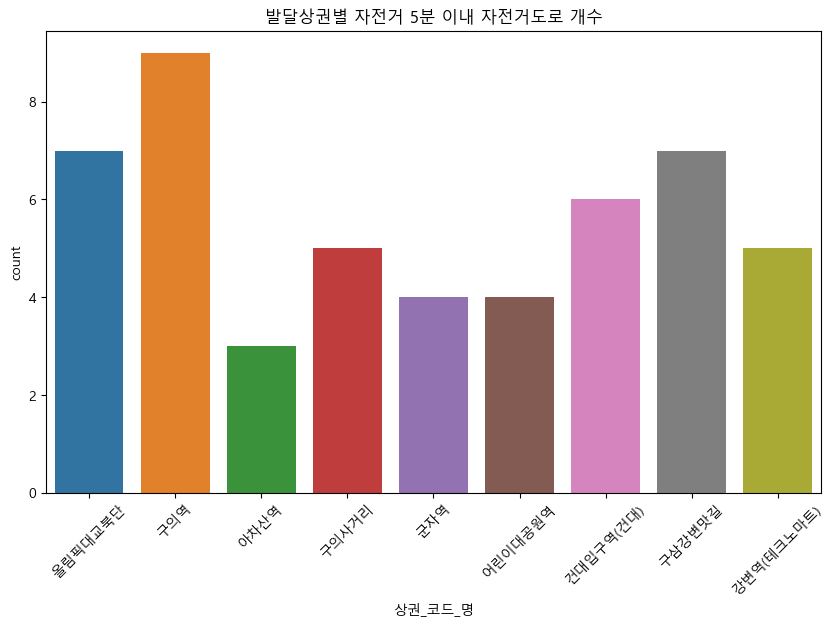

In [ ]:
### 어느 상권에 가까운 자전거도로가 많나
plt.figure(figsize=(10,6))
sns.countplot(x = '상권_코드_명', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 자전거 5분 이내 자전거도로 개수")
plt.show() # 구의역(광진구청)이 가까운 자전거도로가 많고, 아차산역이 가까운 자전거도로가 적다

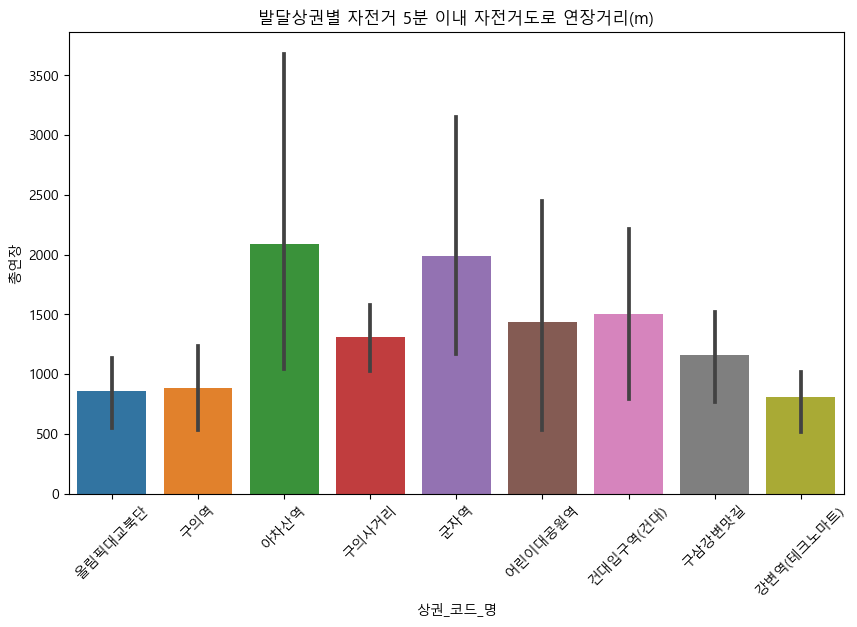

In [ ]:
### 어느 상권의 자전거도로가 길까
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y = '총연장', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 자전거 5분 이내 자전거도로 연장거리(m)")
plt.show() # 아차산역의 자전거도로가 길고, 올림픽대교북단의 자전거도로가 짧다

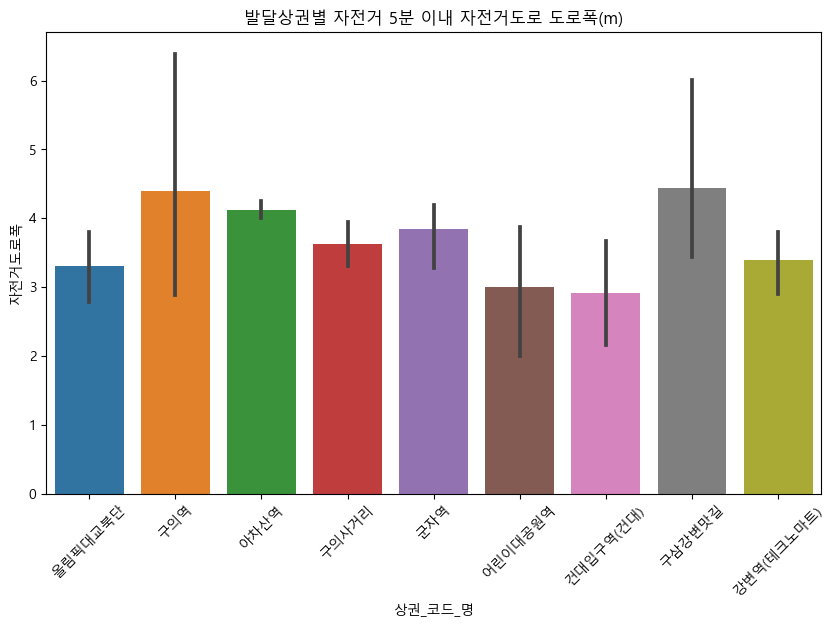

In [ ]:
### 어느 상권의 자전거도로가 넓을까
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y = '자전거도로폭', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 자전거 5분 이내 자전거도로 도로폭(m)")
plt.show() # 구삼강변맛길의 자전거도로가 넓고, 건대입구역의 자전거도로가 좁다

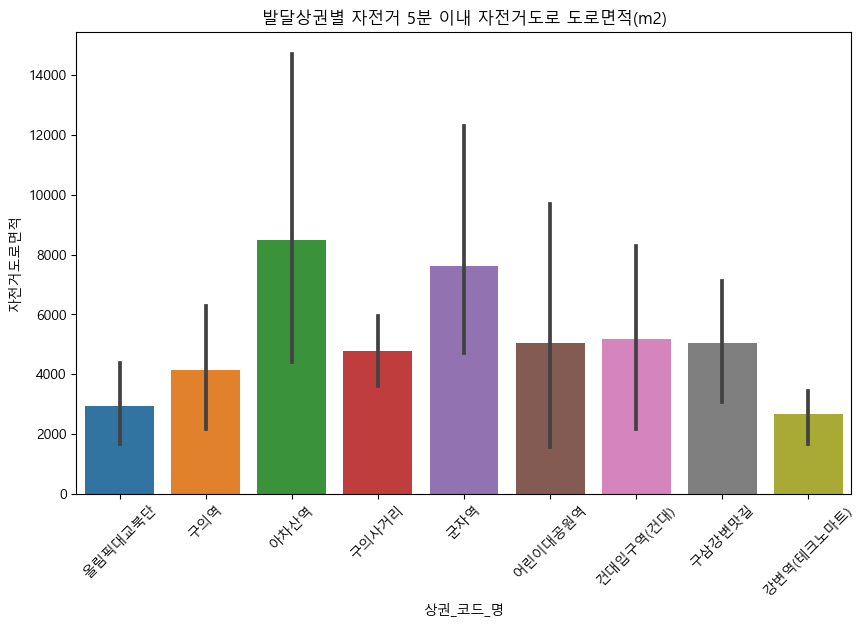

In [ ]:
### 상권별 자전거도로 면적 비교
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y = '자전거도로면적', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 자전거 5분 이내 자전거도로 도로면적(m2)")
plt.show() #아차산역의 자전거도로가 가장 크고 올림픽대교 북단의 자전거도로가 가장 작다

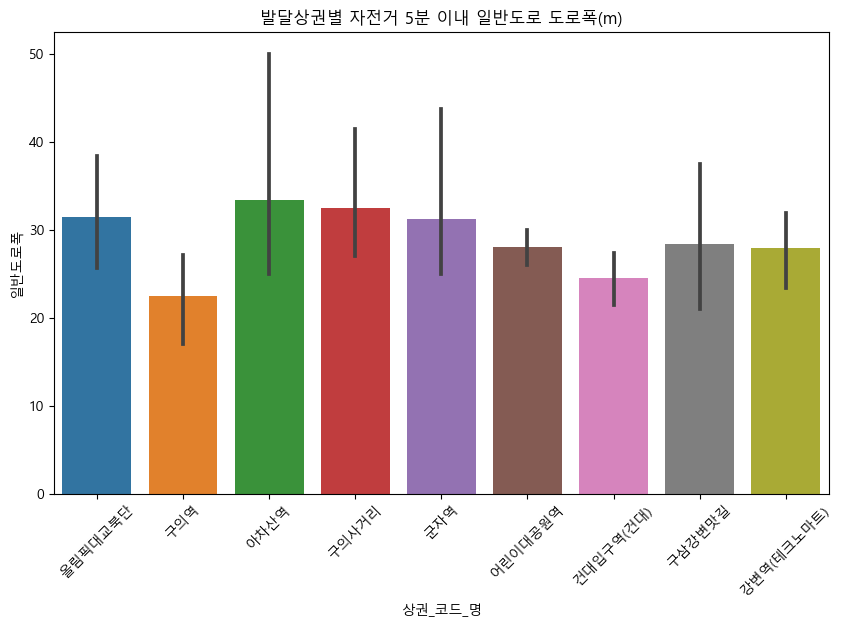

In [ ]:
### 어느 상권의 일반도로가 넓을까
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y = '일반도로폭', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 자전거 5분 이내 일반도로 도로폭(m)")
plt.show() # 아차산역의 일반도로가 넓고 구의역의 일반도로가 좁다

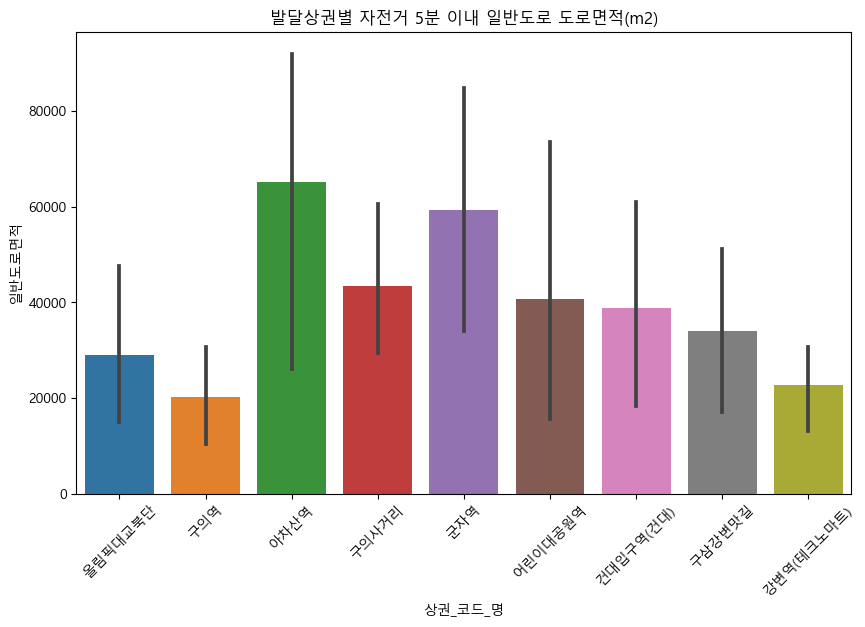

In [ ]:
### 상권별 일반도로 면적 비교
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y = '일반도로면적', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 자전거 5분 이내 일반도로 도로면적(m2)")
plt.show() # 아차산역의 일반도로가 큰 편이며, 구의역의 일반도로가 작은 편이다

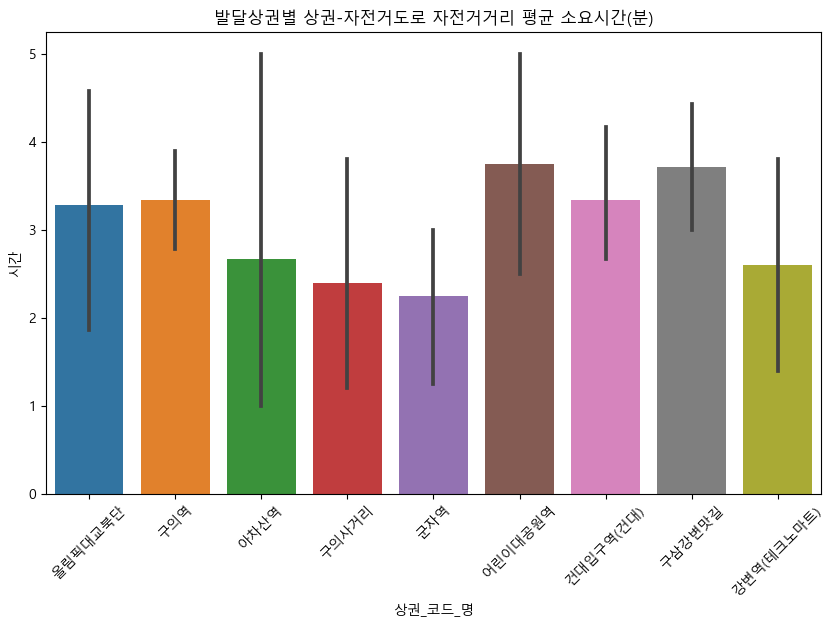

In [ ]:
### 상권별 상권-자전거도로 자전거거리 소요시간 평균
plt.figure(figsize=(10,6))
sns.barplot(x = '상권_코드_명', y = '시간', data = hotplace2)
plt.xticks(rotation = 45)
plt.title("발달상권별 상권-자전거도로 자전거거리 평균 소요시간(분)")
plt.show() # 군자역의 상권과 자전거도로가 가까운 편이며, 어린이대공원역의 상권과 자전거도로가 먼 편이다

In [ ]:
public = pd.read_csv('./전처리 완료/광진구 상권별 대중교통 정류장 수_20230313.csv')
public.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,지하철_역_수,버스_정거장_수,시군구명,행정동명,경도,위도,행정동코드,법정동명
0,0,2022,4,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
1,1,2022,3,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
2,2,2022,2,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
3,3,2022,1,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동
4,4,2021,4,A,골목상권,2110160,광진경찰서,0,0,광진구,구의제1동,127.081126,37.546446,11215850,구의동


In [ ]:
public.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
# 발달 상권에 해당하는 경우만 저장
hotplace3 = public[public['상권_구분_코드_명'] == '발달상권'].reset_index(drop=True)

In [ ]:
# 가장 최근 분기만 보기
recent = hotplace3[(hotplace3['기준_년_코드'] == 2022) & (hotplace3['기준_분기_코드'] == 4)].copy()

temp = recent.groupby(['상권_코드_명']).agg({"지하철_역_수":'sum', "버스_정거장_수":'sum'})
temp = temp.sort_values(by = '버스_정거장_수', ascending=False).reset_index(drop=False)
temp

,상권_코드_명,지하철_역_수,버스_정거장_수
0,아차산역,1,17
1,군자역,2,14
2,구의역,1,10
3,건대입구역(건대),2,9
4,어린이대공원역,0,7
5,구삼강변맛길,0,6
6,구의사거리,0,5
7,올림픽대교북단,0,2
8,강변역(테크노마트),1,1


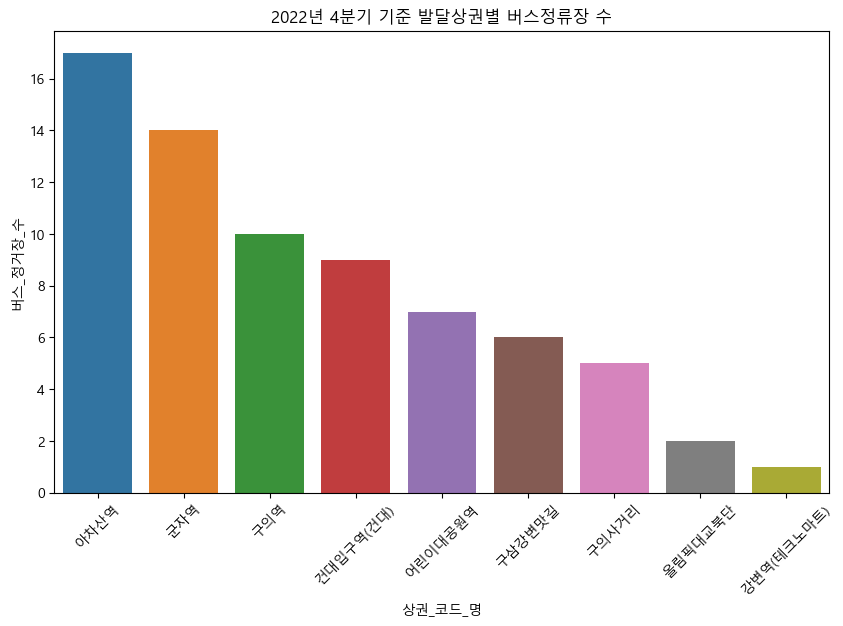

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = '상권_코드_명', y = '버스_정거장_수', data = temp, errorbar=('ci', False))
plt.xticks(rotation=45)
plt.title("2022년 4분기 기준 발달상권별 버스정류장 수")
plt.show() # 아차산역에 버스정류장이 가장 많고 강변역에 가장 적다

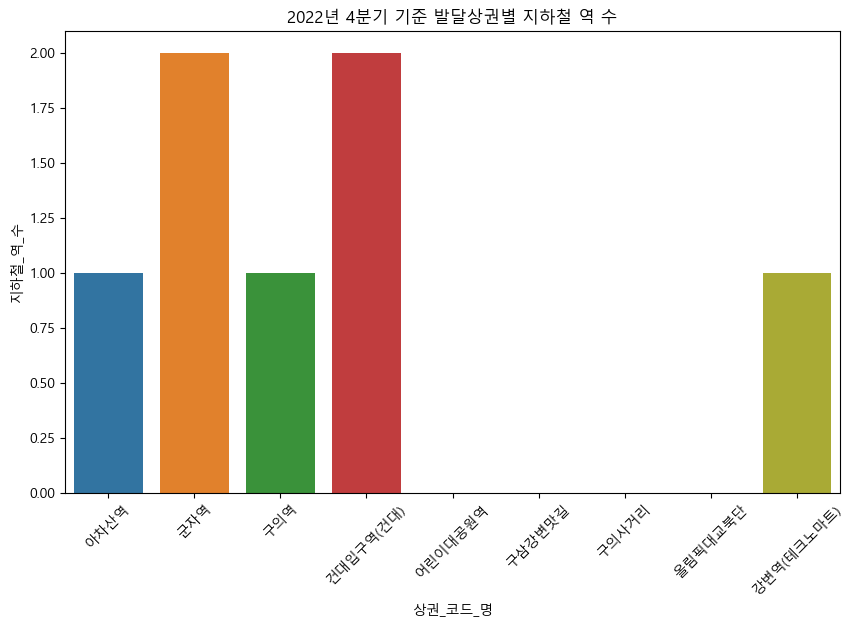

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(x = '상권_코드_명', y = '지하철_역_수', data = temp, errorbar=('ci', False))
plt.xticks(rotation=45)
plt.title("2022년 4분기 기준 발달상권별 지하철 역 수")
plt.show() # 군자역, 건대입구역에 지하철역이 많고 어린이대공원역, 구삼강변맛길, 구의사거리, 올림픽대교 북단에는 지하철역이 없다

In [ ]:
time = hotplace3.groupby(['기준_년_코드', '기준_분기_코드']).agg({'지하철_역_수':'sum', '버스_정거장_수':'sum'}).sort_values(by = ['기준_년_코드', '기준_분기_코드'])
time = time.reset_index(drop=False)
time

,기준_년_코드,기준_분기_코드,지하철_역_수,버스_정거장_수
0,2017,1,5,69
1,2017,2,5,69
2,2017,3,5,69
3,2017,4,5,69
4,2018,1,6,82
5,2018,2,6,82
6,2018,3,6,82
7,2018,4,6,82
8,2019,1,6,82
9,2019,2,6,82


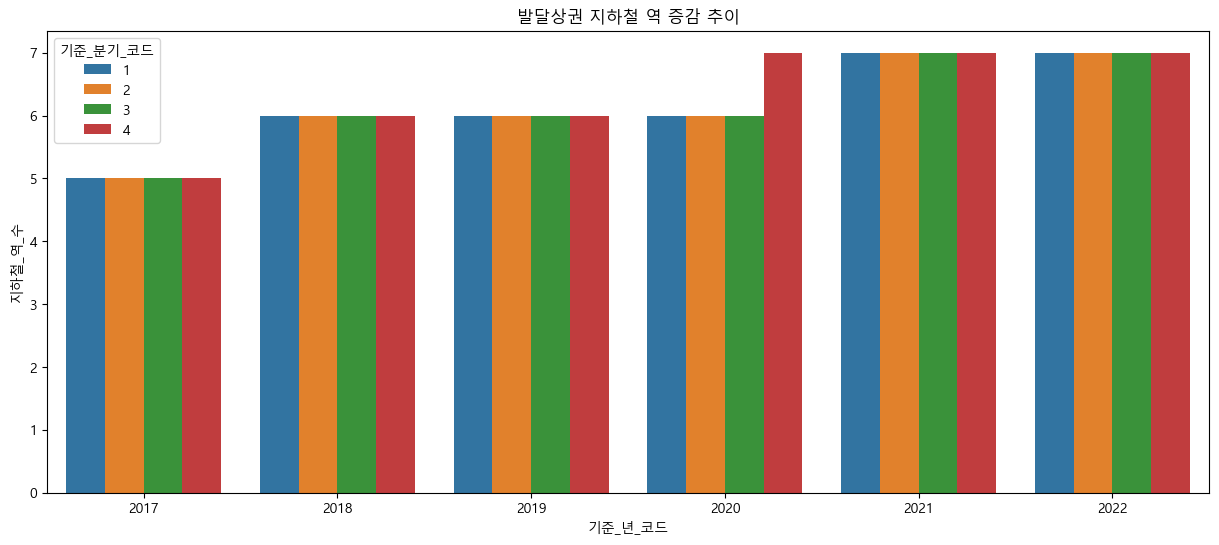

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='기준_년_코드', y='지하철_역_수', data = time, hue='기준_분기_코드')
plt.title("발달상권 지하철 역 증감 추이")
plt.show()

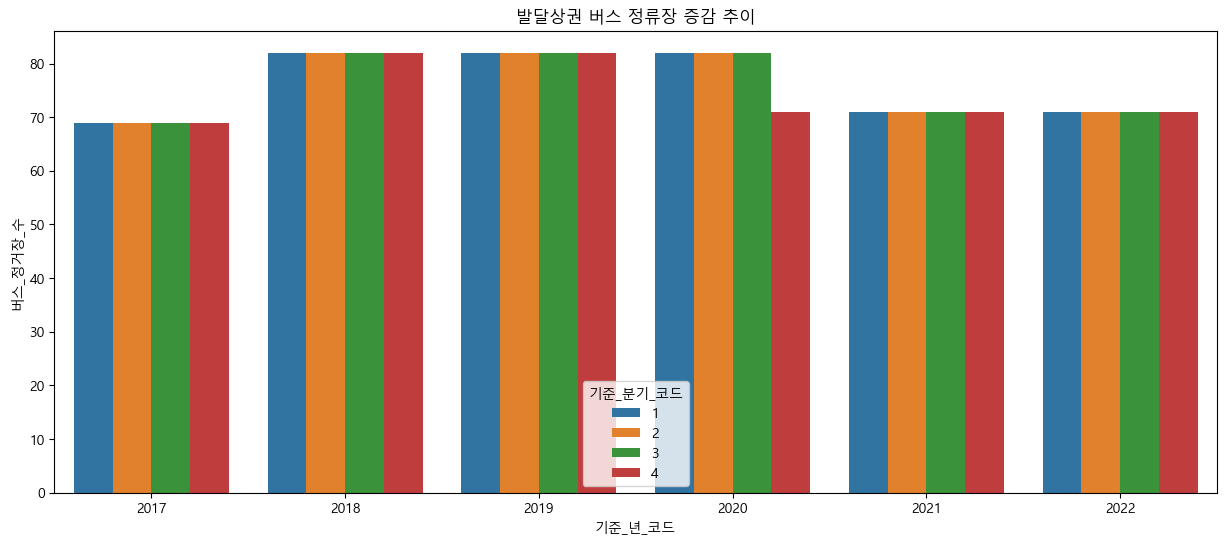

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='기준_년_코드', y='버스_정거장_수', data = time, hue='기준_분기_코드')
plt.title("발달상권 버스 정류장 증감 추이")
plt.show()